<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/4-training-models/04_logistic_softnax_regression_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic/Softnax Regression Fundamentals

Logistic Regression (also called Logit Regression) is commonly
used to estimate the probability that an instance belongs to a particular class (e.g.,
what is the probability that this email is spam?). 

If the estimated probability is greater
than 50%, then the model predicts that the instance belongs to that class (called the
positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to
the negative class, labeled “0”). 

This makes it a binary classifier.

##Setup

In [39]:
# Common imports
import numpy as np
import numpy.random as rnd
import os

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn import datasets


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [40]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

##Estimating Probabilities

Just like a Linear Regression model, a Logistic
Regression model computes a weighted sum of the input features (plus a bias term),
but instead of outputting the result directly like the Linear Regression model does, it
outputs the logistic of this result

$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T \mathbf{x})
$

The logistic—noted $\sigma(·)$—is a sigmoid function (i.e., S-shaped) that outputs a number
between 0 and 1.

$
\sigma(t) = \dfrac{1}{1 + \exp(-t)}
$

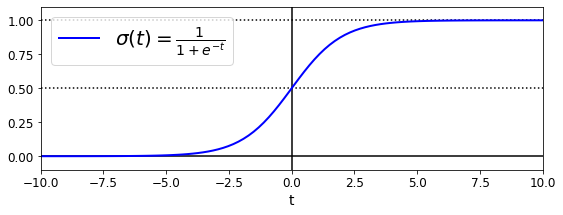

In [41]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

Once the Logistic Regression model has estimated the probability $\hat p = h_\theta(x)$ that an
instance $x$ belongs to the positive class, it can make its prediction $\hat y$ easily.

$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$

Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) ≥ 0.5$ when $t ≥ 0$, so a Logistic Regression
model predicts 1 if $x^⊺ \theta$ is positive and $0$ if it is negative.

The score $t$ is often called the logit. The name comes from the fact
that the logit function, defined as $logit(p) = log(\frac{p}{1 – p})$, is the
inverse of the logistic function. 

Indeed, if you compute the logit of
the estimated probability $p$, you will find that the result is $t$. The
logit is also called the `log-odds`, since it is the log of the ratio
between the estimated probability for the positive class and the
estimated probability for the negative class.

##Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris setosa, Iris versicolor, and Iris virginica.

<img src='https://github.com/rahiakela/machine-learning-research-and-practice/blob/main/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/4-training-models/images/1.png?raw=1' width='600'/>

Let’s try to build a classifier to detect the Iris virginica type based only on the petal
width feature.

In [42]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [43]:
iris["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [44]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)   # 1 if Iris virginica, else 0

Now let’s train a Logistic Regression model:

In [45]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 cm to 3 cm.

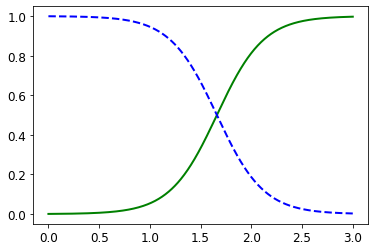

In [46]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


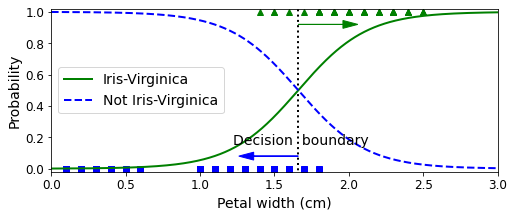

In [47]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

So, what is its decision boundary?

In [48]:
decision_boundary

array([1.66066066])

However, if you ask it to
predict the class (using the `predict()` method rather than the `predict_proba()` method), it will return whichever class is the most likely.

In [49]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Let's train it again but this time displaying two features: petal width
and length. Once trained, the Logistic Regression classifier can, based on these two
features, estimate the probability that a new flower is an Iris virginica. 

The dashed line
represents the points where the model estimates a 50% probability: this is the model’s
decision boundary. Note that it is a linear boundary.

Each parallel line represents the
points where the model outputs a specific probability, from 15% (bottom left) to 90%
(top right). All the flowers beyond the top-right line have an over 90% chance of
being Iris virginica, according to the model.

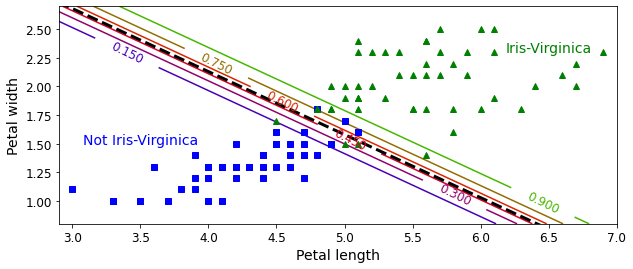

In [50]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

##Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers.This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is simple: when given an instance $x$, the Softmax Regression model first
computes a score $s_k(x)$ for each class k, then estimates the probability of each class by
applying the softmax function (also called the normalized exponential) to the scores.

$
s_k(\mathbf{x}) = ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x}
$

Note that each class has its own dedicated parameter vector $\theta^{(k)}$. All these vectors are
typically stored as rows in a parameter matrix Θ.

Once you have computed the score of every class for the instance $x$, you can estimate
the probability $\hat p_k$ that the instance belongs to class k by running the scores through
the softmax function.

The function computes the exponential of
every score, then normalizes them (dividing by the sum of all the exponentials). The
scores are generally called logits or log-odds (although they are actually unnormalized
log-odds).

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts
the class with the highest estimated probability (which is simply the class with the
highest score).

$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$

The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput), so it should be used only
with mutually exclusive classes, such as different types of plants.
You cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions,
let’s take a look at training. The objective is to have a model that estimates a high
probability for the target class (and consequently a low probability for the other
classes). Minimizing the cost function called the cross
entropy, should lead to this objective because it penalizes the model when it estimates
a low probability for a target class.

Cross entropy is frequently used to measure how
well a set of estimated class probabilities matches the target classes.

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

Notice that when there are just two classes $(K = 2)$, this cost function is equivalent to the Logistic Regression’s cost function.

The gradient vector of this cost function with regard to $\theta^{(k)}$ is given.

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

Now you can compute the gradient vector for every class, then use Gradient Descent
(or any other optimization algorithm) to find the parameter matrix Θ that minimizes
the cost function.


Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-
Learn’s `LogisticRegression` uses one-versus-the-rest by default when you train it on
more than two classes, but you can set the `multi_class` hyperparameter to "multino
mial" to switch it to Softmax Regression. You must also specify a solver that supports
Softmax Regression, such as the "lbfgs" solver.It also applies $L_2$ regularization by default, which you can control using
the hyperparameter C:

In [51]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [52]:
softmax_reg = LogisticRegression(multi_class="multinomial" ,solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

So the next time you find an iris with petals that are 5 cm long and 2 cm wide, you
can ask your model to tell you what type of iris it is, and it will answer Iris virginica
(class 2) with 94.2% probability (or Iris versicolor with 5.8% probability):

In [53]:
softmax_reg.predict([[5, 2]])

array([2])

In [54]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

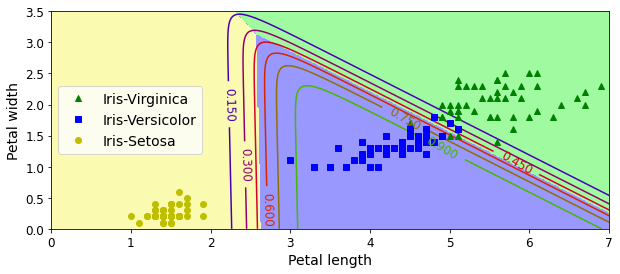

In [55]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

Notice that the decision boundaries between any two classes are linear. The
figure also shows the probabilities for the Iris versicolor class, represented by the
curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary).

Notice that the model can predict a class that has an estimated probability below
50%. For example, at the point where all decision boundaries meet, all classes have an
equal estimated probability of 33%.